# Work Flow Of Machine Learning Project

Every Machine Learning Project has contain the three important stages.
1.Data gathering 
2.Data pre processing
3.Split data into train and test
4.model creation and evaluation

# importing the required libraries 

In [10]:
import pandas as pd
import numpy as np 
import seaborn as sns


# 1. Data Gathering 

In [4]:
df = pd.read_csv("heart.csv")

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 2.Data Analysis

In [12]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

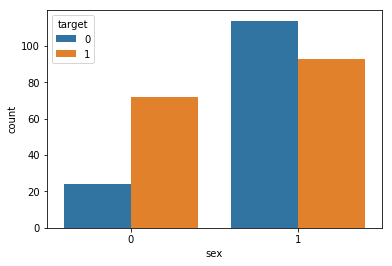

In [33]:
sns.countplot(x="sex",hue="target",data=df)

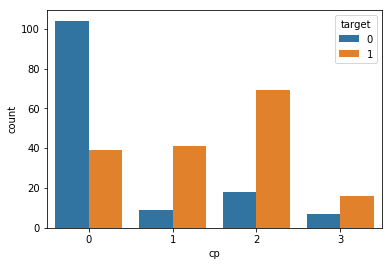

In [30]:
sns.countplot(x="cp",hue="target",data=df)

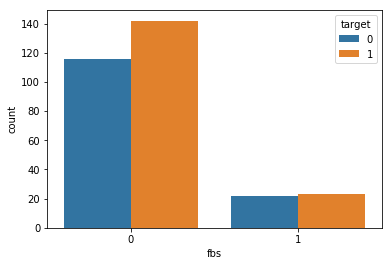

In [32]:
sns.countplot(x="fbs",hue="target",data=df)

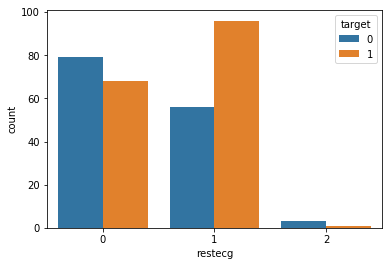

In [34]:
sns.countplot(x="restecg",hue="target",data=df)

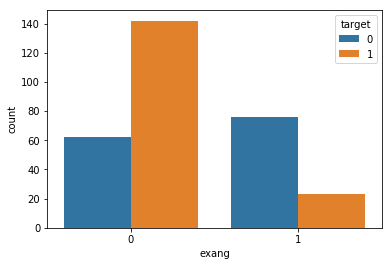

In [36]:
sns.countplot(x="exang",hue="target",data=df)

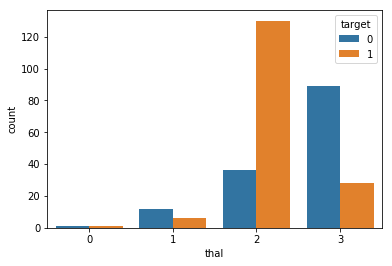

In [37]:
sns.countplot(x="thal",hue="target",data=df)

# 3 Spliting the data into the train and test data 

In [41]:
indep = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]
x = df[indep]
y = df["target"]

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=100)

# 4.creating and evaluating the model

# #LOGESTIC REGRESSION:

In [45]:
from sklearn.linear_model import LogisticRegression


In [47]:
logreg =LogisticRegression(class_weight='balanced')
sd=logreg.fit(X_train,y_train)
logreg.score(X_test,y_test)

0.8571428571428571

In [48]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[37,  9],
       [ 4, 41]], dtype=int64)

# Support Vector Machine(svc)

In [49]:
from sklearn.svm import SVC

In [51]:
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
classifier.score(X_train,y_train),classifier.score(X_test,y_test)

(1.0, 0.4945054945054945)

In [55]:
y_pre = classifier.predict(X_test)
confusion_matrix(y_test,y_pre)

array([[ 0, 46],
       [ 0, 45]], dtype=int64)

# Decsion Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)

In [59]:
dt.score(X_test,y_test)

0.7252747252747253

In [61]:
y_pre = dt.predict(X_test)
confusion_matrix(y_test,y_pre)

array([[31, 15],
       [10, 35]], dtype=int64)